                                                               **INTEGRANTES**

                                                         Esteban Nicolas Peña 202010609

                                                          William Cely López  202012319

# Se recomienda usar Google Colab para la ejecución del código, además cada sección se debe ejecutar 1 a 1, ya que algunos puntos dependen de los dataframes anteriores.

Del cuadernillo Unidad_5_Taller_1_Exploracion_Variables

**Ejercicio 1 **

1. Genere la tabla anterior correspondiente a las frecuencias de la variable cualitativa **Position** del
**ejemplo de BALONCESTO**. Haciendo la equivalencia de cada letra asi: (G = guardia, F =
Delantero, C = centro).

In [109]:
import pandas as pd
import plotly.graph_objects as go

posiciones = ['Guardia', 'Delantero', 'Guardia', 'Delantero', 'Centro', 'Guardia', 'Centro', 'Delantero', 'Guardia', 'Delantero']

df = pd.DataFrame({'Position': posiciones})

frecuencias = df['Position'].value_counts()

fig = go.Figure(data=[go.Table(
    header=dict(
        values=['Posición', 'Frecuencia'],
        line_color='darkslategray',
        fill_color='lightskyblue',
        align='left'
    ),
    cells=dict(
        values=[frecuencias.index.tolist(), frecuencias.values.tolist()],
        line_color='darkslategray',
        fill_color='lightcyan',
        align='center'
    ))
])

fig.show()


**EJERCICIO 2**

2. Observe el DataFrame que contiene los datos metereológicos de Tunja. Identifique el tipo de
variable de cada columna.

In [110]:
import pandas as pd


url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'


try:

    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    print("Primeras filas del DataFrame:")
    print(df.head())

    columnas = []
    tipos_dato = []
    clasificacion = []

    print("\nTipos de datos de cada columna y clasificación:")
    print(f"{'Columna':<40} {'Tipo de Dato':<20} {'Clasificación'}")
    print("-" * 80)

    for col, dtype in df.dtypes.items():
        if dtype == 'object':
            valores_unicos = df[col].unique()
            if len(valores_unicos) <= 10 and pd.api.types.is_numeric_dtype(df[col].astype(str)):
                tipo = 'Cualitativa Ordinal'
            else:
                tipo = 'Cualitativa Nominal'
        elif dtype in ['int64', 'float64', 'Int64']:
            tipo = 'Cuantitativa'
            valores_unicos = df[col].unique()
            if len(valores_unicos) <= 10:
                tipo += ' Discreta'
            else:
                tipo += ' Continua'
        else:
            tipo = 'Otro'
        print(f"{col:<40} {str(dtype):<20} {tipo}")

except Exception as e:
    print(f"Error al leer el archivo: {e}")

Primeras filas del DataFrame:
    Cod_Div   Latitud  Longitud  Región Departamento       Fecha   Hora  \
0  15001000  5.539952 -73.35549     NaN       BOYACÁ  2023-03-31  22:00   
1  15001000  5.539952 -73.35549     NaN       BOYACÁ  2023-03-31  23:00   
2  15001000  5.539952 -73.35549     NaN       BOYACÁ  2023-04-01  00:00   
3  15001000  5.539952 -73.35549     NaN       BOYACÁ  2023-04-01  01:00   
4  15001000  5.539952 -73.35549     NaN       BOYACÁ  2023-04-01  02:00   

   Temperatura  Velocidad del Viento  Dirección del Viento Presión  \
0         11.6                   4.4                 159.6  1018.4   
1         11.4                   1.8                 159.6  1018.3   
2         11.2                   1.8                 150.0  1017.8   
3         11.0                   1.5                 150.0  1016.9   
4         10.7                   1.5                 150.0  1016.0   

   Punto de Rocío  Cobertura total nubosa  Precipitación (mm/h)  \
0            10.9              

3. Utilice la función para calcular los principales valores de las medidas de tendencia central sobre el
DataFrame

In [82]:
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

    resultados = []

    for col in columnas_numericas:
        if df[col].notna().any():
            media = df[col].mean()
            mediana = df[col].median()
            moda = df[col].mode()[0]

            resultados.append({
                'Columna': col,
                'Media': media,
                'Mediana': mediana,
                'Moda': moda
            })
        else:
            resultados.append({
                'Columna': col,
                'Media': 'No disponible',
                'Mediana': 'No disponible',
                'Moda': 'No disponible'
            })

    df_resultados = pd.DataFrame(resultados)

    print("\nMedidas de tendencia central")
    print(df_resultados)

except Exception as e:
    print(f"Error al leer el archivo: {e}")



Medidas de tendencia central
                     Columna          Media        Mediana           Moda
0                    Cod_Div     15001000.0     15001000.0       15001000
1                    Latitud       5.539952       5.539952       5.539952
2                   Longitud      -73.35549      -73.35549      -73.35549
3                     Región  No disponible  No disponible  No disponible
4                Temperatura      12.498684           11.2           10.8
5       Velocidad del Viento       1.719737            1.6            1.6
6       Dirección del Viento     156.717105          159.6          150.0
7             Punto de Rocío       9.968421           10.0           10.0
8     Cobertura total nubosa      98.369737          100.0          100.0
9       Precipitación (mm/h)       0.051316            0.0            0.0
10  Probabilidad de Tormenta            0.0            0.0            0.0
11                   Humedad      86.069737           94.2           95.9


4. Haga una gráfica de caja de bigotes con las datos de Temperatura.

In [83]:
import pandas as pd
import plotly.express as px

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    if 'Temperatura' in df.columns:
        fig = px.box(df, y='Temperatura', title="Gráfica de Caja de Temperatura")
        fig.show()
    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")


5. Aplique las medidas de dispersión (cuartiles, rango intercuartílico, desviación estándar y varianza).

In [84]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'


try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')
    if 'Temperatura' in df.columns:
        temperatura = df['Temperatura']

        Q1 = temperatura.quantile(0.25)
        Q3 = temperatura.quantile(0.75)
        IQR = Q3 - Q1

        desviacion_estandar = temperatura.std()
        varianza = temperatura.var()

        fig = px.box(df, y='Temperatura', title="Gráfica de Caja de Temperatura")

        fig.add_annotation(
            x=0, y=Q1, text=f"Q1: {Q1:.2f}", showarrow=True, arrowhead=2, ax=0, ay=-40,
            font=dict(size=12, color="blue")
        )
        fig.add_annotation(
            x=0, y=Q3, text=f"Q3: {Q3:.2f}", showarrow=True, arrowhead=2, ax=0, ay=40,
            font=dict(size=12, color="blue")
        )
        fig.add_annotation(
            x=0, y=IQR, text=f"Rango Intercuartilico: {IQR:.2f}", showarrow=True, arrowhead=2, ax=0, ay=80,
            font=dict(size=12, color="blue")
        )
        fig.add_annotation(
            x=0, y=desviacion_estandar, text=f"Desviación Estándar: {desviacion_estandar:.2f}", showarrow=True, arrowhead=2, ax=0, ay=120,
            font=dict(size=12, color="blue")
        )
        fig.add_annotation(
            x=0, y=varianza, text=f"Varianza: {varianza:.2f}", showarrow=True, arrowhead=2, ax=0, ay=180,
            font=dict(size=12, color="blue")
        )

        fig.show()

    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")


6. Muestre en un array de numpy los valores de la serie Temperatura

In [85]:
import pandas as pd
import numpy as np

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    if 'Temperatura' in df.columns:
        temperatura_array = np.array(df['Temperatura'])
        print(temperatura_array)
    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")


[11.6 11.4 11.2 11.  10.7 10.1  9.7  9.3  8.9  9.7 11.5 13.4 14.9 16.1
 16.7 16.8 22.1 14.9 14.4 13.7 13.  12.5 11.2 11.2 11.2 11.1 11.  10.7
 10.8 10.6 10.5 10.3 10.1 10.8 12.  13.8 16.  17.3 17.9 17.2 15.9 14.7
 14.1 13.9 12.2 10.6 10.3 10.4 10.6 10.7 10.6 10.5 10.5 10.4 10.4 10.3
 10.2 10.8 11.7 13.  14.8 16.2 16.6 16.3 15.9 15.  14.6 13.3 11.8 11.3
 11.  10.8 10.8 10.9 10.8 10.7]


7. Defina el comportamiento de la Temperatura de Tunja

In [86]:
import pandas as pd
import numpy as np

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    if 'Temperatura' in df.columns:
        temperatura = df['Temperatura']

        media = temperatura.mean()
        mediana = temperatura.median()
        moda = temperatura.mode()[0]
        desviacion_estandar = temperatura.std()
        varianza = temperatura.var()

        Q1 = temperatura.quantile(0.25)
        Q3 = temperatura.quantile(0.75)
        IQR = Q3 - Q1

        print("Comportamiento Estadístico de la Temperatura en Tunja:")
        print(f"  Media: {media}")
        print(f"  Mediana: {mediana}")
        print(f"  Moda: {moda}")
        print(f"  Desviación Estándar: {desviacion_estandar}")
        print(f"  Varianza: {varianza}")
        print(f"  Cuartil 1 (Q1): {Q1}")
        print(f"  Cuartil 3 (Q3): {Q3}")
        print(f"  Rango Intercuartílico (IQR): {IQR}")
    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")


Comportamiento Estadístico de la Temperatura en Tunja:
  Media: 12.498684210526315
  Mediana: 11.2
  Moda: 10.8
  Desviación Estándar: 2.5961763381841703
  Varianza: 6.740131578947367
  Cuartil 1 (Q1): 10.6
  Cuartil 3 (Q3): 14.45
  Rango Intercuartílico (IQR): 3.8499999999999996


8. Cual es el rango de la Temperatura mas frecuente de Tunja

In [87]:
import pandas as pd
import numpy as np


url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    if 'Temperatura' in df.columns:
        temperatura = df['Temperatura']
        moda = temperatura.mode()[0]

        bins = np.arange(temperatura.min(), temperatura.max() + 1, 1)
        binned_temperatura = pd.cut(temperatura, bins=bins)

        frecuencia = binned_temperatura.value_counts().sort_index(ascending=False)

        intervalo_frecuente = frecuencia.idxmax()

        print(f"La temperatura más frecuente (moda) es: {moda}")
        print(f"El rango de temperaturas más frecuente es: {intervalo_frecuente}")

    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")


La temperatura más frecuente (moda) es: 10.8
El rango de temperaturas más frecuente es: (9.9, 10.9]


9. Defina en que rangos de Temperatura los valores son mas dispersos


Rangos de dispersión de la temperatura:
                         std    IQR
Temperatura_binned                 
8.9-13.9            1.048629  0.875
13.9-18.9           1.137499  1.800

EL RANGO DE TEMPERATURA CON MAYOR DISPERSION ES: 13.9-18.9


<ipython-input-88-0a4504e4a757>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



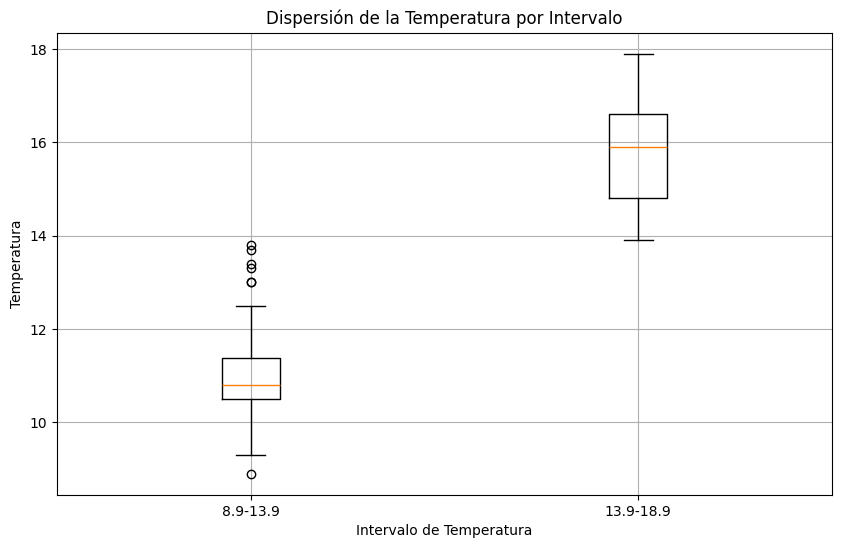

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(df['Temperatura'].min(), df['Temperatura'].max(), 5)
labels = [f'{x}-{x+5}' for x in bins[:-1]]
df['Temperatura_binned'] = pd.cut(df['Temperatura'], bins=bins, labels=labels, right=False)

dispersion = df.groupby('Temperatura_binned')['Temperatura'].agg(
    Q1=lambda x: np.percentile(x, 25),
    Q3=lambda x: np.percentile(x, 75),
    std='std'
)

dispersion['IQR'] = dispersion['Q3'] - dispersion['Q1']

print("\nRangos de dispersión de la temperatura:")
print(dispersion[['std', 'IQR']])
rango_max_dispersion = dispersion['IQR'].idxmax()
print(f"\nEL RANGO DE TEMPERATURA CON MAYOR DISPERSION ES: {rango_max_dispersion}")

plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Temperatura_binned'] == bin]['Temperatura'] for bin in labels], labels=labels)
plt.xlabel('Intervalo de Temperatura')
plt.ylabel('Temperatura')
plt.title('Dispersión de la Temperatura por Intervalo')
plt.grid(True)
plt.show()

10. En qué cuartil de la variable Temperatura, se ubican la mayor cantidad de datos.

In [89]:
import pandas as pd
import numpy as np


Q1 = np.percentile(df['Temperatura'], 25)
Q2 = np.percentile(df['Temperatura'], 50)
Q3 = np.percentile(df['Temperatura'], 75)

def cuartil(x):
    if x <= Q1:
        return 'Q1'
    elif x <= Q2:
        return 'Q2'
    elif x <= Q3:
        return 'Q3'
    else:
        return 'Q4'

df['Cuartil'] = df['Temperatura'].apply(cuartil)


conteo_cuartiles = df['Cuartil'].value_counts()
cuartil_max_datos = conteo_cuartiles.idxmax()
cantidad_max_datos = conteo_cuartiles.max()

print(f"El cuartil con más datos es: {cuartil_max_datos} con {cantidad_max_datos} datos.")


El cuartil con más datos es: Q1 con 20 datos.


**Ejercicio 3**

11. Haga una gráfica de caja de bigotes con las datos de Humedad.

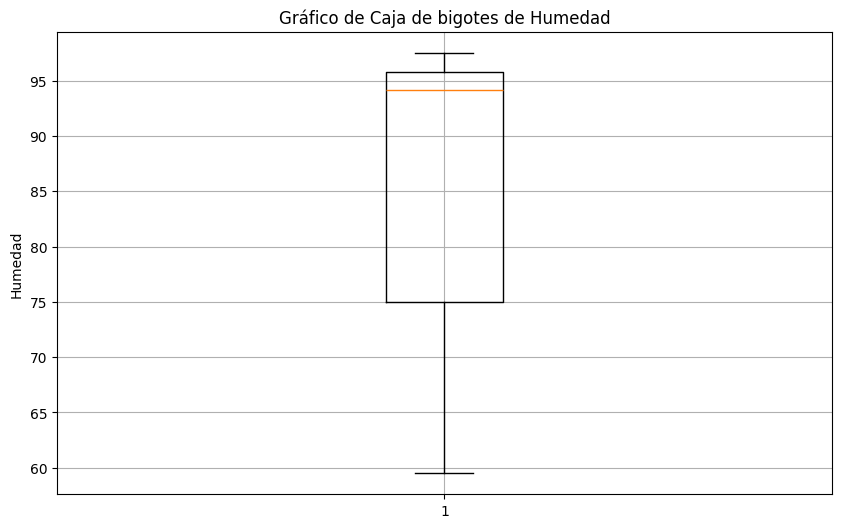

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(df['Humedad'])
plt.title('Gráfico de Caja de bigotes de Humedad')
plt.ylabel('Humedad')
plt.grid(True)
plt.show()


12. Aplique las medidas de dispersión (cuartiles, rango intercuartílico, desviación estándar y varianza).

In [91]:
import pandas as pd
import numpy as np


Q1 = np.percentile(df['Humedad'], 25)
Q2 = np.percentile(df['Humedad'], 50)
Q3 = np.percentile(df['Humedad'], 75)

IQR = Q3 - Q1

std_dev = df['Humedad'].std()

variance = df['Humedad'].var()

print(f"MEDIDAS DE DISPERSIÓN HUMEDAD")
print(f"Primer cuartil (Q1): {Q1}")
print(f"Mediana (Q2): {Q2}")
print(f"Tercer cuartil (Q3): {Q3}")
print(f"Rango intercuartílico (IQR): {IQR}")
print(f"Desviación estándar: {std_dev}")
print(f"Varianza: {variance}")

MEDIDAS DE DISPERSIÓN HUMEDAD
Primer cuartil (Q1): 74.975
Mediana (Q2): 94.2
Tercer cuartil (Q3): 95.8
Rango intercuartílico (IQR): 20.825000000000003
Desviación estándar: 12.454279261756763
Varianza: 155.1090719298246


13. Muestre en un array de numpy los valores de la serie Humedad

In [92]:
import numpy as np

humedad_array = df['Humedad'].values
print(humedad_array)

[95.3 95.7 96.3 95.8 95.4 93.9 94.2 94.3 94.1 90.2 75.2 70.8 67.6 65.4
 64.3 61.6 61.8 66.  72.7 80.9 91.  94.5 95.1 95.2 94.3 94.2 94.9 95.5
 95.9 96.  96.1 95.9 95.7 92.4 87.5 77.2 66.6 61.5 59.5 62.8 70.9 76.6
 80.9 81.1 89.4 95.9 96.3 95.6 95.2 94.9 95.8 96.6 97.2 97.5 97.2 96.6
 96.7 94.6 87.8 82.2 73.8 68.1 67.4 68.1 69.9 74.3 77.1 85.5 92.1 94.4
 95.5 96.2 96.4 96.7 96.9 96.6]


14. Defina el comportamiento de la Humedad de Tunja

In [93]:
import pandas as pd
import numpy as np

estadisticas_basicas = df['Humedad'].describe()
mediana = np.percentile(df['Humedad'], 50)

Q1 = np.percentile(df['Humedad'], 25)
Q3 = np.percentile(df['Humedad'], 75)

IQR = Q3 - Q1

desviacion_estandar = df['Humedad'].std()
varianza = df['Humedad'].var()

moda = df['Humedad'].mode()[0]
rango = df['Humedad'].max() - df['Humedad'].min()

print("Estadísticas Descriptivas Básicas:")
print(estadisticas_basicas)

print(f"\nMediana (Q2): {mediana}")
print(f"Primer Cuartil (Q1): {Q1}")
print(f"Tercer Cuartil (Q3): {Q3}")
print(f"Rango Intercuartílico (IQR): {IQR}")
print(f"Desviación Estándar: {desviacion_estandar}")
print(f"Varianza: {varianza}")
print(f"Moda: {moda}")
print(f"Rango: {rango}")


Estadísticas Descriptivas Básicas:
count    76.000000
mean     86.069737
std      12.454279
min      59.500000
25%      74.975000
50%      94.200000
75%      95.800000
max      97.500000
Name: Humedad, dtype: float64

Mediana (Q2): 94.2
Primer Cuartil (Q1): 74.975
Tercer Cuartil (Q3): 95.8
Rango Intercuartílico (IQR): 20.825000000000003
Desviación Estándar: 12.454279261756763
Varianza: 155.1090719298246
Moda: 95.9
Rango: 38.0


15. Cual es el rango de la Humedad mas frecuente de Tunja

In [94]:
import pandas as pd
import numpy as np

bins = np.arange(0, 101, 10)
labels = [f'{i}-{i+10}' for i in range(0, 100, 10)]

df['Rango_Humedad'] = pd.cut(df['Humedad'], bins=bins, labels=labels, right=False)

rango_frecuente = df['Rango_Humedad'].value_counts().idxmax()
print(f"El rango de humedad más frecuente en Tunja es: {rango_frecuente}")

El rango de humedad más frecuente en Tunja es: 90-100


16. Identifique en que rangos de Humedad los valores son mas dispersos


Rangos de dispersión de la humedad:
                     std    IQR
Humedad_binned                 
59.5-64.5       1.586716  1.025
64.5-69.5       1.053113  1.550
69.5-74.5       1.791833  2.700
74.5-79.5       0.921502  0.875
79.5-84.5       0.623832  0.475
84.5-89.5       1.601041  1.200
89.5-94.5       1.511592  2.000

EL RANGO DE HUMEDAD CON MAYOR DISPERSION ES: 69.5-74.5


<ipython-input-95-89fb45f6a7d2>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



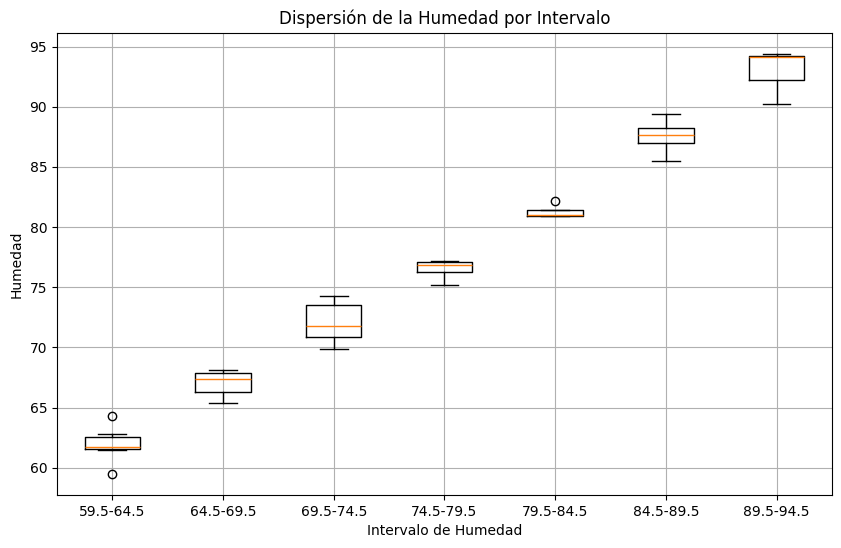

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(df['Humedad'].min(), df['Humedad'].max(), 5)
labels = [f'{x}-{x+5}' for x in bins[:-1]]
df['Humedad_binned'] = pd.cut(df['Humedad'], bins=bins, labels=labels, right=False)

dispersion = df.groupby('Humedad_binned')['Humedad'].agg(
    Q1=lambda x: np.percentile(x, 25),
    Q3=lambda x: np.percentile(x, 75),
    std='std'
)

dispersion['IQR'] = dispersion['Q3'] - dispersion['Q1']

print("\nRangos de dispersión de la humedad:")
print(dispersion[['std', 'IQR']])

rango_max_dispersion = dispersion['IQR'].idxmax()
print(f"\nEL RANGO DE HUMEDAD CON MAYOR DISPERSION ES: {rango_max_dispersion}")

plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Humedad_binned'] == bin]['Humedad'] for bin in labels], labels=labels)
plt.xlabel('Intervalo de Humedad')
plt.ylabel('Humedad')
plt.title('Dispersión de la Humedad por Intervalo')
plt.grid(True)
plt.show()


17. Identifique un valor de Velocidad del Viento atipico para Tunja

In [96]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

Q1 = np.percentile(df['Velocidad del Viento'], 25)
Q3 = np.percentile(df['Velocidad del Viento'], 75)
IQR = Q3 - Q1

limite_inferior_IQR = Q1 - 1.5 * IQR
limite_superior_IQR = Q3 + 1.5 * IQR

outliers_IQR = df[(df['Velocidad del Viento'] < limite_inferior_IQR) | (df['Velocidad del Viento'] > limite_superior_IQR)]

media = df['Velocidad del Viento'].mean()
desviacion_estandar = df['Velocidad del Viento'].std()

limite_inferior_std = media - 3 * desviacion_estandar
limite_superior_std = media + 3 * desviacion_estandar

outliers_std = df[(df['Velocidad del Viento'] < limite_inferior_std) | (df['Velocidad del Viento'] > limite_superior_std)]
outliers_df = pd.DataFrame({
    'Método': ['IQR'] * len(outliers_IQR) + ['Desviación Estándar'] * len(outliers_std),
    'Velocidad del Viento': list(outliers_IQR['Velocidad del Viento']) + list(outliers_std['Velocidad del Viento']),
    'Valor Atípico': ['Sí'] * (len(outliers_IQR) + len(outliers_std))
})

fig = go.Figure(data=[go.Table(
    header=dict(values=["Método de Identificación", "Valor de la Velocidad del Viento", "¿Es Atípico?"]),
    cells=dict(values=[outliers_df['Método'], outliers_df['Velocidad del Viento'], outliers_df['Valor Atípico']])
)])

fig.update_layout(title="Valores Atípicos de la Velocidad del Viento")
fig.show()

**EJERCICIO 4**

18. Para la variable pronósticos realice análisis de frecuencia para categorizar los tipos de valores
únicos.

In [102]:
import pandas as pd

frecuencias = df['Pronóstico'].value_counts()

print("Análisis de Frecuencia de los Pronósticos:")
print(frecuencias)

umbral_alta = 3
umbral_media = 2

def categorizar(frecuencia):
    if frecuencia >= umbral_alta:
        return 'Alta'
    elif frecuencia >= umbral_media:
        return 'Media'
    else:
        return 'Baja'

frecuencias_categorizadas = frecuencias.apply(categorizar)

print("\nFrecuencias Categorizadas de los Pronósticos:")
print(frecuencias_categorizadas)

Análisis de Frecuencia de los Pronósticos:
Pronóstico
Nublado               3
Soleado               2
Nublado - Llovizna    1
Lluvia                1
Name: count, dtype: int64

Frecuencias Categorizadas de los Pronósticos:
Pronóstico
Nublado                Alta
Soleado               Media
Nublado - Llovizna     Baja
Lluvia                 Baja
Name: count, dtype: object


                            **Del cuadernillo Unidad_5_Taller_2_Preprossesing_Parte 1 y Parte 2**

**Ejercicio 1**

Represente los valores de la variable temperatura en un grafico de cajas o bigotes. Analice el
comportamiento de la variable.

In [103]:
import pandas as pd
import plotly.express as px

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    if 'Temperatura' in df.columns:
        fig = px.box(df, y='Temperatura', title="Gráfica de Caja de Temperatura", color_discrete_sequence=['#FF5733'])

        fig.update_layout(
            title={'x': 0.5}
        )

        fig.show()
    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")




Distribución:

**Asimetría positiva:** La caja está ligeramente desplazada hacia la izquierda, lo que sugiere que la distribución de la temperatura es ligeramente asimétrica positiva, significa que hay más valores de temperatura bajos que altos.
**Presencia de valores atípicos:** Se observa un valor atípico en la parte superior del diagrama, indicando una temperatura significativamente más alta que el resto de los datos.

Medidas de tendencia central:

**Mediana:** La mediana de la temperatura se encuentra alrededor de 11.2 grados, lo que indica que la mitad de las observaciones tienen una temperatura inferior a este valor y la otra mitad superior.

**Primer cuartil (Q1):** El primer cuartil se encuentra alrededor de 10 grados, lo que significa que el 25% de las observaciones tienen una temperatura inferior a 10 grados.

**Tercer cuartil (Q3):** El tercer cuartil se encuentra alrededor de 14.5 grados, lo que significa que el 75% de las observaciones tienen una temperatura inferior a 14.5 grados.

**Ejercicio 2**

Observe los valores de la variable temperatura en un array

In [104]:
import pandas as pd
import numpy as np

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    if 'Temperatura' in df.columns:
        temperatura_array = np.array(df['Temperatura'])

        print("Valores de la variable Temperatura en un array:")
        print(temperatura_array)
    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")


Valores de la variable Temperatura en un array:
[11.6 11.4 11.2 11.  10.7 10.1  9.7  9.3  8.9  9.7 11.5 13.4 14.9 16.1
 16.7 16.8 22.1 14.9 14.4 13.7 13.  12.5 11.2 11.2 11.2 11.1 11.  10.7
 10.8 10.6 10.5 10.3 10.1 10.8 12.  13.8 16.  17.3 17.9 17.2 15.9 14.7
 14.1 13.9 12.2 10.6 10.3 10.4 10.6 10.7 10.6 10.5 10.5 10.4 10.4 10.3
 10.2 10.8 11.7 13.  14.8 16.2 16.6 16.3 15.9 15.  14.6 13.3 11.8 11.3
 11.  10.8 10.8 10.9 10.8 10.7]


**Ejercicio 3**

Grafique los datos de la variable temperatura en gráfico px.scatter

In [105]:
import pandas as pd
import plotly.express as px

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    if 'Temperatura' in df.columns:
        fig = px.scatter(df, y='Temperatura',
                         title='Gráfico de Dispersión de la Temperatura',
                         labels={'Temperatura': 'Temperatura (°C)'},
                         template='plotly_dark',
                         opacity=0.7,
                         color='Temperatura',
                         color_continuous_scale='Viridis')

        fig.show()
    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")
except Exception as e:
    print(f"Error al leer el archivo: {e}")

**Ejercicio 4**

Graficar el histograma que representa los valores de la variable, Temperatura.

In [106]:
import pandas as pd
import plotly.express as px

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    if 'Temperatura' in df.columns:
        fig = px.histogram(df, x='Temperatura',
                           title='Distribución de Temperatura',
                           labels={'Temperatura': 'Temperatura (°C)'},
                           nbins=20,
                           template='plotly_dark',
                           color_discrete_sequence=['#FF6347'],
                           opacity=0.7)

        fig.show()
    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")
except Exception as e:
    print(f"Error al leer el archivo: {e}")

**Ejercicio 5**

Genere un gráfico tipo px.scatter a partir de los datos anteriores

In [107]:
import pandas as pd
import plotly.express as px

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

    if 'Temperatura' in df.columns:
        fig = px.scatter(df, x=df.index, y='Temperatura',
                         title='Gráfico de Dispersión de Temperatura',
                         labels={'Temperatura': 'Temperatura (°C)', 'index': 'Índice'},
                         template='plotly_dark',
                         color_discrete_sequence=['#FF6347'],
                         opacity=0.7)

        fig.show()
    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")

**Ejercicio 6**

Use técnicas de normalización de datos y grafique para obtener un resultado similar al gráfico
siguiente

In [108]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler

url = 'https://drive.google.com/uc?export=download&id=1SJ13MxsuoJw4xuMylvqktCXhlCZf-XQD'

try:
    df = pd.read_csv(url, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')


    if 'Temperatura' in df.columns:
        # Normalización Min-Max (escala de 0 a 1)
        min_max_scaler = MinMaxScaler()
        df['Temperatura_MinMax'] = min_max_scaler.fit_transform(df[['Temperatura']])

        # Estandarización Z-Score
        standard_scaler = StandardScaler()
        df['Temperatura_ZScore'] = standard_scaler.fit_transform(df[['Temperatura']])

        # Crear el gráfico para la normalización Min-Max
        fig_minmax = px.scatter(df, x=df.index, y='Temperatura_MinMax',
                                title='Temperatura Normalizada (Min-Max)',
                                labels={'Temperatura_MinMax': 'Temperatura Normalizada (0-1)', 'index': 'Índice'},
                                template='plotly_dark',
                                color_discrete_sequence=['#FF6347'],
                                opacity=0.7)

        # Crear el gráfico para la estandarización Z-Score
        fig_zscore = px.scatter(df, x=df.index, y='Temperatura_ZScore',
                                title='Temperatura Estandarizada (Z-Score)',
                                labels={'Temperatura_ZScore': 'Temperatura Estandarizada (Z-Score)', 'index': 'Índice'},
                                template='plotly_dark',
                                color_discrete_sequence=['#FF6347'],
                                opacity=0.7)

        fig_minmax.show()
        fig_zscore.show()

    else:
        print("La columna 'Temperatura' no se encuentra en el DataFrame.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")